In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg, stats
from matplotlib.ticker import MaxNLocator

import tensor_utils as utils

np.random.seed(14159)
plt.style.use('default')
plt.rcParams["text.usetex"] = True

# Model
$$
\mathbf{T} = \beta \bigotimes_{i = 1}^d \mathbf{x}^{(i)} + \frac{1}{\sqrt{N}} \mathbf{W}
\qquad\qquad \mathbf{W}_{i_1, \ldots, i_d} \overset{\text{i.i.d.}}{\sim} \mathcal{N}(0, 1)
\qquad\qquad \mathbf{B}_{i_1, \ldots, i_d} \overset{\text{i.i.d.}}{\sim} \mathcal{B}(\varepsilon)
$$

In [2]:
# Set parameters
n = np.array([200, 400, 600])
# n = np.array([400, 400, 400])
beta = 3
eps = 0.57

d = len(n)
N = np.sum(n)
c = n/N

setting = "$N = {{{}}} \\quad \\mathbf{{c}} = {{{}}}^\\top \\quad \\beta = {} \\quad \\varepsilon = {}$".format(N, list(np.round(c, 2)), beta, eps)

In [3]:
# Model
x = [stats.norm.rvs(size=ni) for ni in n]
x = [x[i]/linalg.norm(x[i]) for i in range(d)]
T_full = utils.make_T(n, x, beta)
B = utils.make_B(n, eps)
T = T_full*B

# Computations

In [4]:
# Best rank-1 approximation of T
sigma, svecs = utils.CPD1(T)
print("sigma =", sigma)

# Associated random matrix model
PhiM = utils.Phi(T, svecs)

# Eigenvalues and eigenvectors of PhiM
eigvals, eigvecs = linalg.eigh(PhiM)

# Alignments
align_emp = [np.abs(x[i]@svecs[i]) for i in range(d)]

sigma = 1.8640187611195542


In [5]:
xmin, xmax = utils.plot_interv(eigvals.min(), eigvals.max())

# Limiting Spectral Distribution (LSD)
xx = np.linspace(xmin, xmax, 200)
eta = 1e-5
gg = utils.stieltjes(xx+eta*1j, c, eps, maxiter=np.inf)
LSD = gg['g'].imag/np.pi

# Asymptotic singular value and alignments
beta_est, align_th = utils.alignments(sigma, c, eps)
print("beta_est =", beta_est)

beta_est = 2.971375623225645


# Plots

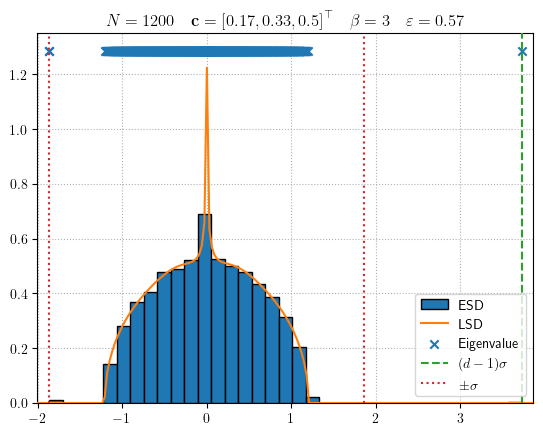

In [6]:
plt.hist(eigvals, density=True, bins='sqrt', color='C0', edgecolor='black', zorder=3, label="ESD")
plt.plot(xx, LSD, zorder=4, color='C1', label="LSD")
ymin, ymax = plt.ylim()
plt.scatter(eigvals, ymax*np.ones_like(eigvals), marker='x', color='C0', zorder=4, label="Eigenvalue")
plt.axvline((d-1)*sigma, ls='--', color='C2', zorder=4, label="$( d - 1 ) \\sigma$")
plt.axvline(sigma, ls=':', color='C3', zorder=4, label="$\\pm \\sigma$")
plt.axvline(-sigma, ls=':', color='C3', zorder=4)
plt.grid(ls=':')
plt.xlim(xmin, xmax)
plt.legend()
plt.title(setting);

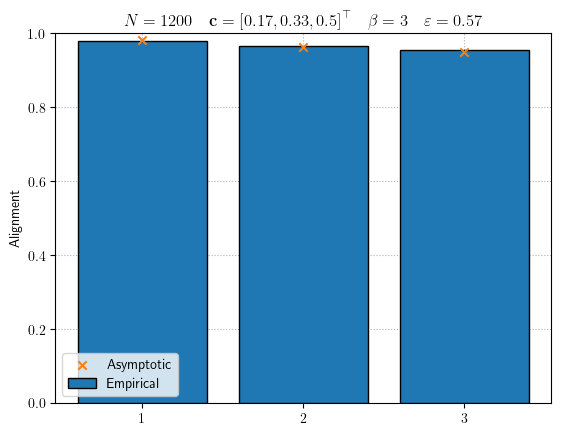

In [7]:
ax = plt.figure().gca()
dim = 1+np.arange(d)
plt.bar(dim, align_emp, edgecolor='black', zorder=3, label="Empirical")
plt.scatter(dim, align_th, marker='x', zorder=3, label="Asymptotic")
plt.grid(ls=':')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0, 1)
plt.ylabel("Alignment")
plt.legend()
plt.title(setting);